This notebook is to validate precipitation
Obs=gauge
sim=dss

## Gauge validation : Mcintosh Run Near Leonardtown, MD – 01661350 (USGS)​

## Data: DSS file AORC

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# === Step 1: Load file and sheets ===
file_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\Precip_Validation2021.xlsx"

In [89]:
# === Step 2: Read Observed ===
df_obs = pd.read_excel(file_path, sheet_name='Obs')
df_obs['Datime'] = pd.to_datetime(df_obs['Datime'], format="%m/%d/%Y %H:%M")
df_obs = df_obs.set_index('Datime').resample('1h').sum().reset_index()

# === Step 3: Read Simulated ===
df_sim = pd.read_excel(file_path, sheet_name='Sim')
df_sim['Datime'] = pd.to_datetime(df_sim['Datime'], format="%d%b%Y %H%M")
#df_sim = df_sim.set_index('Datime').resample('1h').sum().reset_index()

# === Step 4: Merge ===
df_merged = pd.merge(df_obs, df_sim, on='Datime', how='inner')

## === Step 5: Calculate metrics 1 and 4km===

In [90]:
# Calculate percentage bias between observed and simulated precipitation (1km)
# Formula: PBIAS = 100 * (sum(sim) - sum(obs)) / sum(obs)

sum_obs = obs.sum()
sum_sim1km = df_merged['Precip(in)_sim1km'].sum()
pbias1 = 100 * (sum_sim1km - sum_obs) / sum_obs if sum_obs != 0 else np.nan

print(f"Percentage Bias (PBIAS) for Precip(in)_sim1km: {pbias1:.2f}%")

Percentage Bias (PBIAS) for Precip(in)_sim1km: 17.73%


In [91]:
# Calculate percentage bias between observed and simulated precipitation (1km)
# Formula: PBIAS = 100 * (sum(sim) - sum(obs)) / sum(obs)

sum_obs = obs.sum()
sum_sim4km = df_merged['Precip(in)_sim4km'].sum()
pbias4 = 100 * (sum_sim4km - sum_obs) / sum_obs if sum_obs != 0 else np.nan

print(f"Percentage Bias (PBIAS) for Precip(in)_sim4km: {pbias4:.2f}%")

Percentage Bias (PBIAS) for Precip(in)_sim4km: 23.64%


In [92]:
# Calculate RMSE between observed and simulated (1km)
rmse1 = np.sqrt(mean_squared_error(obs, df_merged['Precip(in)_sim1km']))
print(f"RMSE between observed and simulated (1km): {rmse1:.4f}")

RMSE between observed and simulated (1km): 0.0757


In [63]:
# Calculate RMSE between observed and simulated (4km)
rmse4 = np.sqrt(mean_squared_error(obs, df_merged['Precip(in)_sim4km']))
print(f"RMSE between observed and simulated (4km): {rmse4:.4f}")

RMSE between observed and simulated (4km): 0.0803


In [64]:
# Calculate R² between observed and simulated (1km)
r2_1km = r2_score(obs, df_merged['Precip(in)_sim1km'])
print(f"R² (Observed vs Simulated 1km): {r2_1km:.4f}")

R² (Observed vs Simulated 1km): -1.0514


In [65]:
# Calculate R² between observed and simulated (4km)
r2_4km = r2_score(obs, df_merged['Precip(in)_sim4km'])
print(f"R² (Observed vs Simulated 4km): {r2_4km:.4f}")

R² (Observed vs Simulated 4km): -1.3094


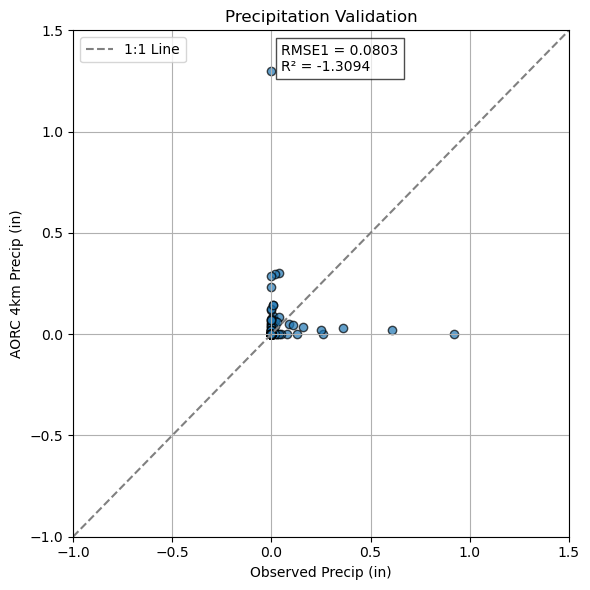

In [79]:
#Scatter plot of observed vs simulated precipitation
# === Step 6: Plot ===
plt.figure(figsize=(6, 6))
plt.scatter(obs, df_merged['Precip(in)_sim4km'], alpha=0.7, edgecolor='k')

# === Custom 1:1 line and limits ===
xlim, ylim = (-1.0, 1.5), (-1.0, 1.5)
plt.plot(xlim, ylim, "--", color="gray", label="1:1 Line")
plt.xlim(xlim)
plt.ylim(ylim)

# === Labels and metrics ===
plt.xlabel('Observed Precip (in)')
plt.ylabel('AORC 4km Precip (in)')
plt.title('Precipitation Validation')

# ✅ FIXED: Use ylim for positioning text
plt.text(x=0.05, y=ylim[1] - 0.2, 
         s=f'RMSE1 = {rmse4:.4f}\nR² = {r2_4km:.4f}',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## time series

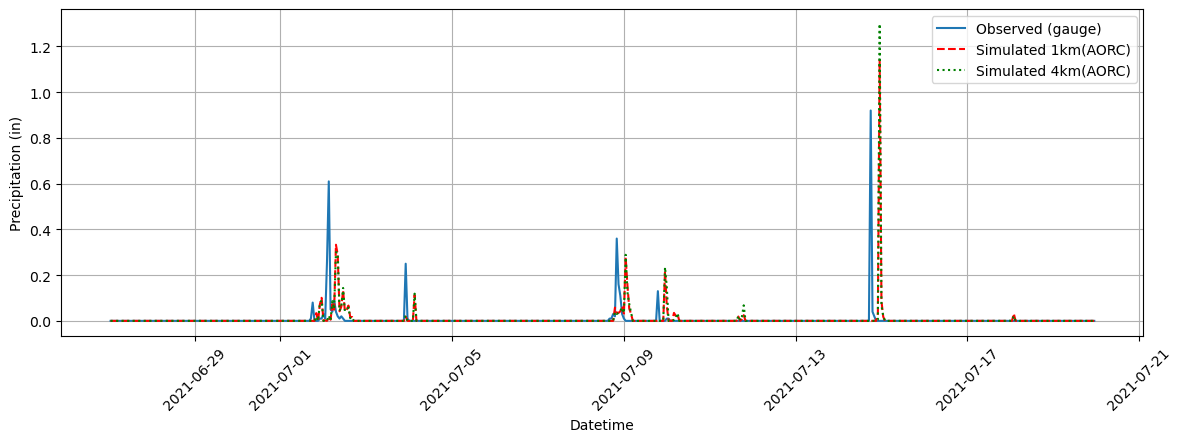

In [93]:
#Time series plot of observed vs simulated precipitation
# === Step 5: Plot time series ===
plt.figure(figsize=(12, 4))
plt.plot(df_merged['Datime'], df_merged['Precip(in)_obs'], label='Observed (gauge)', linewidth=1.5)
plt.plot(df_merged['Datime'], df_merged['Precip(in)_sim1km'], label='Simulated 1km(AORC)', linewidth=1.5, linestyle='--', color='red')
plt.plot(df_merged['Datime'], df_merged['Precip(in)_sim4km'], label='Simulated 4km(AORC)', linewidth=1.5, linestyle=':', color='green')

#plt.title('Observed vs Simulated Precipitation')
plt.xlabel('Datetime')
plt.ylabel('Precipitation (in)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [15]:
##Calculate shift in hours

# Remove mean (for correlation)
obs_centered = obs - np.mean(obs)
sim_centered = sim - np.mean(sim)

# === Cross-correlation ===
correlation = np.correlate(sim_centered, obs_centered, mode='full')
lags = np.arange(-len(obs) + 1, len(obs))
best_lag = lags[np.argmax(correlation)]

# === Time shift in hours ===
print(f"Best time shift: {best_lag} hours")


Best time shift: 5 hours


## Independent Calculation of Accumulated Precipitation (No Merge)



In [85]:
# === Step 2: Load Observed ===
df_obs = pd.read_excel(file_path, sheet_name='Obs')
df_obs['Datime'] = pd.to_datetime(df_obs['Datime'], format="%m/%d/%Y %H:%M")

# === Step 3: Load Simulated ===
df_sim = pd.read_excel(file_path, sheet_name='Sim')
df_sim['Datime'] = pd.to_datetime(df_sim['Datime'], format="%d%b%Y %H%M")

# === Step 4: Filter both to common date range ===
start_date = max(df_obs['Datime'].min(), df_sim['Datime'].min())
end_date = min(df_obs['Datime'].max(), df_sim['Datime'].max())

df_obs_filtered = df_obs[(df_obs['Datime'] >= start_date) & (df_obs['Datime'] <= end_date)].copy()
df_sim_filtered = df_sim[(df_sim['Datime'] >= start_date) & (df_sim['Datime'] <= end_date)].copy()

# === Step 5: Cumulative sum independently ===
df_obs_filtered['Cumulative_Obs'] = df_obs_filtered['Precip(in)_obs'].cumsum()
df_sim_filtered['Cumulative_Sim_1km'] = df_sim_filtered['Precip(in)_sim1km'].cumsum()
df_sim_filtered['Cumulative_Sim_4km'] = df_sim_filtered['Precip(in)_sim4km'].cumsum()


# === Step 6: Print results ===
total_obs = df_obs_filtered['Cumulative_Obs'].iloc[-1]
total_sim1 = df_sim_filtered['Cumulative_Sim_1km'].iloc[-1]
total_sim4 = df_sim_filtered['Cumulative_Sim_4km'].iloc[-1]

print(f"Filtered Date Range: {start_date} to {end_date}")
print(f"Total Observed (gauge) Precipitation: {total_obs:.4f} inches")
print(f"Total Simulated (AORC1km) Precipitation: {total_sim1:.4f} inches")
print(f"Total Simulated (AORC4km) Precipitation: {total_sim4:.4f} inches")


Filtered Date Range: 2021-06-27 01:00:00 to 2021-07-19 23:00:00
Total Observed (gauge) Precipitation: 3.4300 inches
Total Simulated (AORC1km) Precipitation: 4.0380 inches
Total Simulated (AORC4km) Precipitation: 4.2410 inches


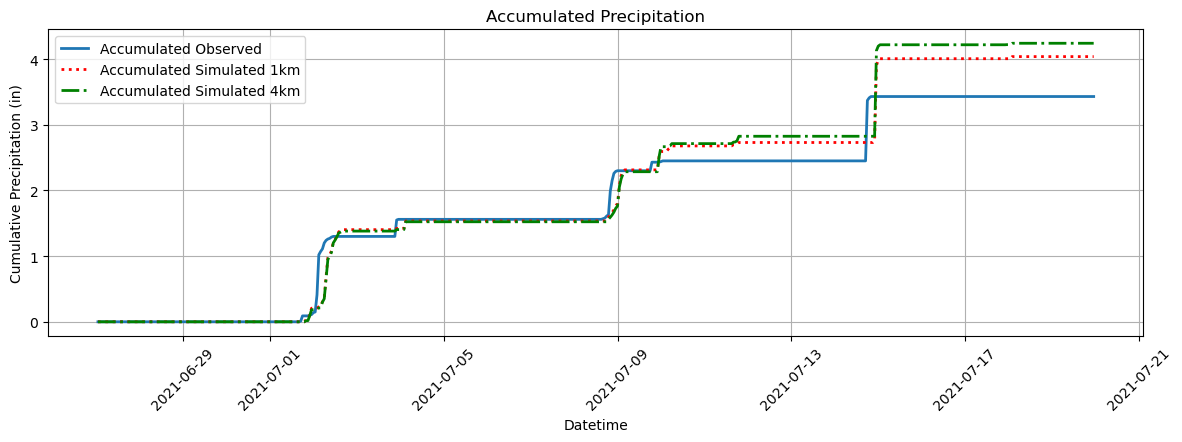

Total Accumulated Observed Precipitation: 3.4300 inches
Total Accumulated Simulated Precipitation 1km: 4.0380 inches
Total Accumulated Simulated Precipitation 4km: 4.2410 inches


In [87]:
# === Step 5: Calculate cumulative sums (accumulated precipitation) ===
df_merged['Cumulative_Obs'] = df_merged['Precip(in)_obs'].cumsum()
df_merged['Cumulative_Sim_1km'] = df_merged['Precip(in)_sim1km'].cumsum()
df_merged['Cumulative_Sim_4km'] = df_merged['Precip(in)_sim4km'].cumsum()

# === Step 6: Plot cumulative precipitation ===
plt.figure(figsize=(12, 4))
plt.plot(df_merged['Datime'], df_merged['Cumulative_Obs'], label='Accumulated Observed', linewidth=2)
plt.plot(df_merged['Datime'], df_merged['Cumulative_Sim_1km'], label='Accumulated Simulated 1km', linewidth=2, linestyle=':', color='red')
plt.plot(df_merged['Datime'], df_merged['Cumulative_Sim_4km'], label='Accumulated Simulated 4km', linewidth=2, linestyle='-.', color='green')

plt.title('Accumulated Precipitation')
plt.xlabel('Datetime')
plt.ylabel('Cumulative Precipitation (in)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# === Step 7: Print total accumulated values ===
total_obs = df_merged['Cumulative_Obs'].iloc[-1]
total_sim1km = df_merged['Cumulative_Sim_1km'].iloc[-1]
total_sim4km = df_merged['Cumulative_Sim_4km'].iloc[-1]
print(f"Total Accumulated Observed Precipitation: {total_obs:.4f} inches")
print(f"Total Accumulated Simulated Precipitation 1km: {total_sim1km:.4f} inches")
print(f"Total Accumulated Simulated Precipitation 4km: {total_sim4km:.4f} inches")



## Gauge validation : METEOROLOGICAL STATION AT LAKE SMITH, VA - 365333076095600 (USGS)

## Data: DSS file AORC

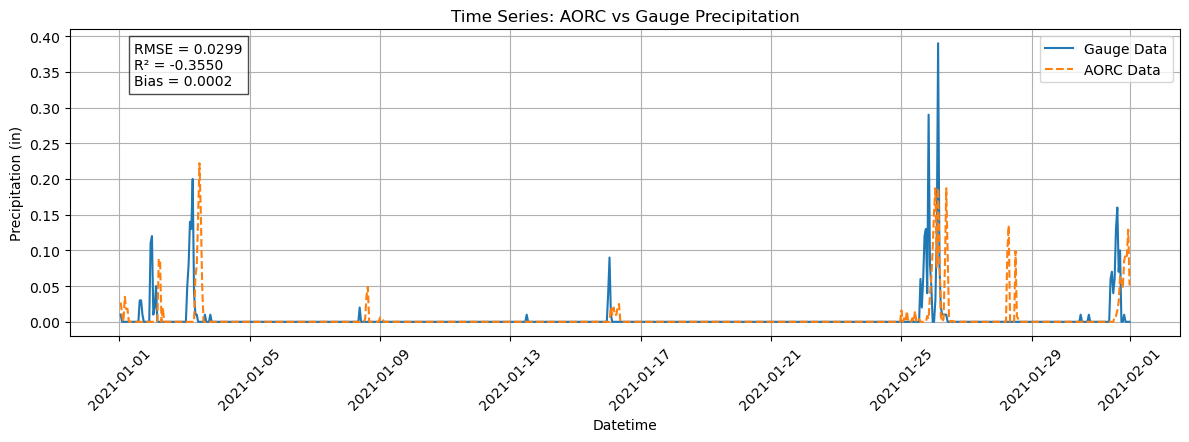

In [ ]:
#time series plot of observed vs simulated precipitation and metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# === Step 1: Load Excel data ===
file_path = r"C:\Github\Lab_work\Pocomoke\Results_step2\Precip_Validation.xlsx"

# === Step 2: Read Observed ===
df_obs = pd.read_excel(file_path, sheet_name='Obs2')
df_obs['Datime'] = pd.to_datetime(df_obs['Datime'], format="%m/%d/%Y %H:%M")
df_obs = df_obs.set_index('Datime').resample('1h').sum().reset_index()

# === Step 3: Read Simulated ===
df_sim = pd.read_excel(file_path, sheet_name='Sim2')
df_sim['Datime'] = pd.to_datetime(df_sim['Datime'], format="%d%b%Y %H%M")
df_sim = df_sim.set_index('Datime').resample('1h').sum().reset_index()

# === Step 4: Merge data on Datime ===
df_merged = pd.merge(df_obs, df_sim, on='Datime', how='inner')

# === Step 5: Calculate metrics ===
obs = df_merged['Precip(in)_obs']
sim = df_merged['Precip(in)_sim']
rmse = np.sqrt(mean_squared_error(obs, sim))
r2 = r2_score(obs, sim)
bias = (sim - obs).mean()

# === Step 6: Time Series Plot ===
plt.figure(figsize=(12, 4))
plt.plot(df_merged['Datime'], obs, label='Gauge Data', linewidth=1.5)
plt.plot(df_merged['Datime'], sim, label='AORC Data', linewidth=1.5, linestyle='--')

# === Metrics Text Box ===
metrics_text = f"RMSE = {rmse:.4f}\nR² = {r2:.4f}\nBias = {bias:.4f}"
plt.text(df_merged['Datime'].iloc[10], max(obs.max(), sim.max()) * 0.85,
         metrics_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# === Formatting ===
plt.title('Time Series: AORC vs Gauge Precipitation')
plt.xlabel('Datetime')
plt.ylabel('Precipitation (in)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
##Calculate shift in hours
# Remove mean (for correlation)
obs_centered = obs - np.mean(obs)
sim_centered = sim - np.mean(sim)

# === Cross-correlation ===
correlation = np.correlate(sim_centered, obs_centered, mode='full')
lags = np.arange(-len(obs) + 1, len(obs))
best_lag = lags[np.argmax(correlation)]

# === Time shift in hours ===
print(f"Best time shift: {best_lag} hours")

Best time shift: 6 hours


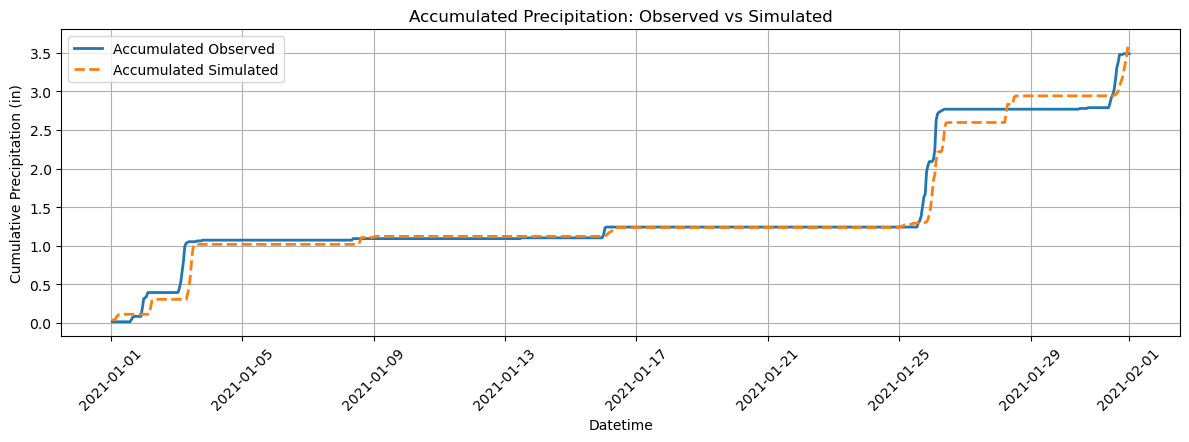

Total Accumulated Observed Precipitation: 3.4900 inches
Total Accumulated Simulated Precipitation: 3.6260 inches


In [ ]:
#Cumulative precipitation plot
# import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load Excel data ===
file_path = r"C:\Github\Lab_work\Pocomoke\Results_step2\Precip_Validation.xlsx"

# === Step 2: Load Observed Data ===
df_obs = pd.read_excel(file_path, sheet_name='Obs2')
df_obs['Datime'] = pd.to_datetime(df_obs['Datime'], format="%m/%d/%Y %H:%M")
df_obs = df_obs.set_index('Datime').resample('1h').sum().reset_index()  # Resample to hourly

# === Step 3: Load Simulated Data ===
df_sim = pd.read_excel(file_path, sheet_name='Sim2')
df_sim['Datime'] = pd.to_datetime(df_sim['Datime'], format="%d%b%Y %H%M")
df_sim = df_sim.set_index('Datime').resample('1h').sum().reset_index()  # Resample to hourly

# === Step 4: Merge both datasets on datetime ===
df_merged = pd.merge(df_obs, df_sim, on='Datime', how='inner')

# === Step 5: Calculate cumulative sums (accumulated precipitation) ===
df_merged['Cumulative_Obs'] = df_merged['Precip(in)_obs'].cumsum()
df_merged['Cumulative_Sim'] = df_merged['Precip(in)_sim'].cumsum()

# === Step 6: Plot cumulative precipitation ===
plt.figure(figsize=(12, 4))
plt.plot(df_merged['Datime'], df_merged['Cumulative_Obs'], label='Accumulated Observed', linewidth=2)
plt.plot(df_merged['Datime'], df_merged['Cumulative_Sim'], label='Accumulated Simulated', linewidth=2, linestyle='--')

plt.title('Accumulated Precipitation: Observed vs Simulated')
plt.xlabel('Datetime')
plt.ylabel('Cumulative Precipitation (in)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# === Step 7: Print total accumulated values ===
total_obs = df_merged['Cumulative_Obs'].iloc[-1]
total_sim = df_merged['Cumulative_Sim'].iloc[-1]
print(f"Total Accumulated Observed Precipitation: {total_obs:.4f} inches")
print(f"Total Accumulated Simulated Precipitation: {total_sim:.4f} inches")

In [16]:
import pandas as pd

# === Step 1: Load Excel file ===
file_path = r"C:\Github\Lab_work\Pocomoke\Results_step2\Precip_Validation.xlsx"

# === Step 2: Load Observed ===
df_obs = pd.read_excel(file_path, sheet_name='Obs2')
df_obs['Datime'] = pd.to_datetime(df_obs['Datime'], format="%m/%d/%Y %H:%M")

# === Step 3: Load Simulated ===
df_sim = pd.read_excel(file_path, sheet_name='Sim2')
df_sim['Datime'] = pd.to_datetime(df_sim['Datime'], format="%d%b%Y %H%M")

# === Step 4: Filter both to common date range ===
start_date = max(df_obs['Datime'].min(), df_sim['Datime'].min())
end_date = min(df_obs['Datime'].max(), df_sim['Datime'].max())

df_obs_filtered = df_obs[(df_obs['Datime'] >= start_date) & (df_obs['Datime'] <= end_date)].copy()
df_sim_filtered = df_sim[(df_sim['Datime'] >= start_date) & (df_sim['Datime'] <= end_date)].copy()

# === Step 5: Cumulative sum independently ===
df_obs_filtered['Cumulative_Obs'] = df_obs_filtered['Precip(in)_obs'].cumsum()
df_sim_filtered['Cumulative_Sim'] = df_sim_filtered['Precip(in)_sim'].cumsum()

# === Step 6: Print results ===
total_obs = df_obs_filtered['Cumulative_Obs'].iloc[-1]
total_sim = df_sim_filtered['Cumulative_Sim'].iloc[-1]

print(f"Filtered Date Range: {start_date} to {end_date}")
print(f"Total Observed Precipitation: {total_obs:.4f} inches")
print(f"Total Simulated Precipitation: {total_sim:.4f} inches")

Filtered Date Range: 2021-01-01 01:00:00 to 2021-02-01 00:55:00
Total Observed Precipitation: 3.4900 inches
Total Simulated Precipitation: 3.6260 inches
